In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Nice style
plt.style.use("ggplot")

In [ ]:
# Load dataset
df = pd.read_csv("mec_smart_home_advanced_600.csv")

In [ ]:
# Timestamp ko datetime me convert karo
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
print("Shape:", df.shape)
print(df.head())

Shape: (600, 18)
  device_id      room         device_type  temperature  humidity  \
0  DEV_0001   Hallway  Smart Refrigerator        21.15     49.44   
1  DEV_0002  Bathroom          Smart Plug          NaN     56.00   
2  DEV_0003    Garage       Motion Sensor        19.66     65.00   
3  DEV_0004   Hallway     Security Camera        22.13     41.87   
4  DEV_0005   Kitchen      Smoke Detector        19.33     72.12   

   motion_detected  power_usage_W  noise_level_dB  air_quality_index  co2_ppm  \
0                0         951.94             NaN             104.11   820.94   
1                0         191.14           36.93              88.16   368.44   
2                1        1014.91           55.04              65.37  1300.20   
3                1         489.01             NaN             211.45   976.06   
4                0        1030.12           25.34              73.43  1955.46   

   latency_ms  edge_processing_time_ms  bandwidth_usage_MB edge_server  \
0       40.66

In [ ]:
df.info

<bound method DataFrame.info of     device_id      room         device_type  temperature  humidity  \
0    DEV_0001   Hallway  Smart Refrigerator        21.15     49.44   
1    DEV_0002  Bathroom          Smart Plug          NaN     56.00   
2    DEV_0003    Garage       Motion Sensor        19.66     65.00   
3    DEV_0004   Hallway     Security Camera        22.13     41.87   
4    DEV_0005   Kitchen      Smoke Detector        19.33     72.12   
..        ...       ...                 ...          ...       ...   
595  DEV_0596  Bathroom        Light Sensor        34.94     69.21   
596  DEV_0597    Garage            Smart AC        22.76     33.31   
597  DEV_0598   Hallway        Light Sensor        26.38     60.88   
598  DEV_0599  Bathroom            Smart AC        15.29     93.85   
599  DEV_0600   Balcony            Smart AC        16.81     90.30   

     motion_detected  power_usage_W  noise_level_dB  air_quality_index  \
0                  0         951.94             NaN  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   device_id                600 non-null    object        
 1   room                     600 non-null    object        
 2   device_type              600 non-null    object        
 3   temperature              540 non-null    float64       
 4   humidity                 540 non-null    float64       
 5   motion_detected          600 non-null    int64         
 6   power_usage_W            540 non-null    float64       
 7   noise_level_dB           540 non-null    float64       
 8   air_quality_index        540 non-null    float64       
 9   co2_ppm                  600 non-null    float64       
 10  latency_ms               540 non-null    float64       
 11  edge_processing_time_ms  540 non-null    float64       
 12  bandwidth_usage_MB       600 non-nul

In [ ]:
df.head()

,device_id,room,device_type,temperature,humidity,motion_detected,power_usage_W,noise_level_dB,air_quality_index,co2_ppm,latency_ms,edge_processing_time_ms,bandwidth_usage_MB,edge_server,offloaded_to_edge,cpu_load_edge_percent,network_jitter_ms,timestamp
0,DEV_0001,Hallway,Smart Refrigerator,21.15,49.44,0,951.94,NaN,104.11,820.94,40.66,45.77,5.13,Edge_3,0,81.62,27.68,2025-11-21 15:06:00
1,DEV_0002,Bathroom,Smart Plug,NaN,56.00,0,191.14,36.93,88.16,368.44,35.44,30.42,1.44,Edge_3,1,40.79,2.60,2025-11-21 15:06:00
2,DEV_0003,Garage,Motion Sensor,19.66,65.00,1,1014.91,55.04,65.37,1300.20,23.30,44.69,5.43,Edge_3,1,66.14,24.80,2025-11-21 15:05:00
3,DEV_0004,Hallway,Security Camera,22.13,41.87,1,489.01,NaN,211.45,976.06,129.29,154.97,18.25,Edge_4,1,50.02,2.09,2025-11-21 15:05:00
4,DEV_0005,Kitchen,Smoke Detector,19.33,72.12,0,1030.12,25.34,73.43,1955.46,76.51,NaN,12.70,Edge_3,1,26.91,11.65,2025-11-21 15:04:00


In [ ]:
df.tail()

,device_id,room,device_type,temperature,humidity,motion_detected,power_usage_W,noise_level_dB,air_quality_index,co2_ppm,latency_ms,edge_processing_time_ms,bandwidth_usage_MB,edge_server,offloaded_to_edge,cpu_load_edge_percent,network_jitter_ms,timestamp
595,DEV_0596,Bathroom,Light Sensor,34.94,69.21,1,13.75,39.04,123.94,788.28,8.93,187.55,9.37,Edge_1,1,66.42,4.67,2025-11-21 10:09:00
596,DEV_0597,Garage,Smart AC,22.76,33.31,0,947.12,68.47,NaN,1795.58,50.95,188.45,4.88,Edge_3,0,19.64,13.20,2025-11-21 10:08:00
597,DEV_0598,Hallway,Light Sensor,26.38,60.88,1,672.61,38.48,179.14,383.68,71.88,39.08,9.45,Edge_1,1,71.25,14.95,2025-11-21 10:08:00
598,DEV_0599,Bathroom,Smart AC,15.29,93.85,0,203.14,85.73,13.28,692.84,24.75,175.58,9.16,Edge_4,1,52.53,11.91,2025-11-21 10:07:00
599,DEV_0600,Balcony,Smart AC,16.81,90.30,0,1436.99,64.55,238.34,1825.56,147.74,148.80,11.68,Edge_4,0,86.00,11.53,2025-11-21 10:07:00


Visualization</b>

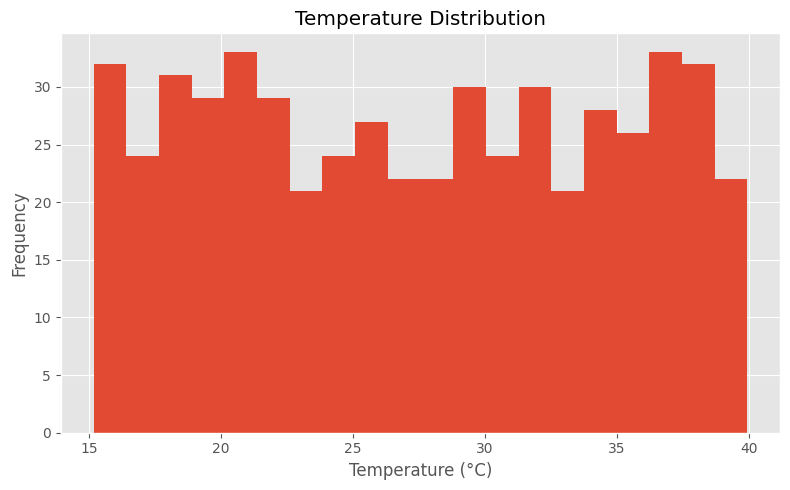

In [ ]:
# Tempareture Distribution

plt.figure(figsize=(8, 5))
plt.hist(df["temperature"].dropna(), bins=20)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

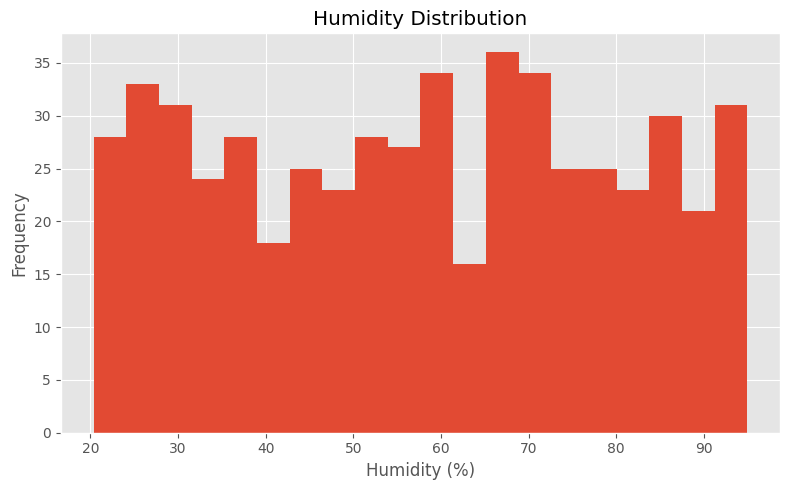

In [ ]:
# Humidity Distribution

plt.figure(figsize=(8, 5))
plt.hist(df["humidity"].dropna(), bins=20)
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

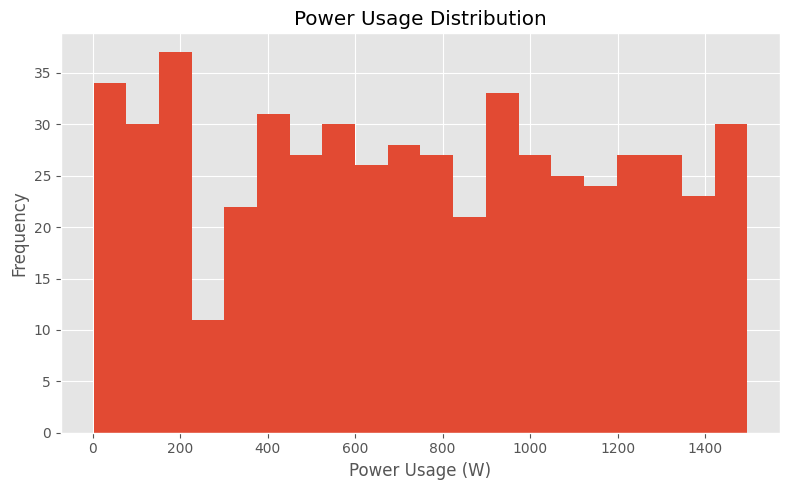

In [ ]:
# Overall power usage distribution

plt.figure(figsize=(8, 5))
plt.hist(df["power_usage_W"].dropna(), bins=20)
plt.title("Power Usage Distribution")
plt.xlabel("Power Usage (W)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
power_by_device = (
    df.groupby("device_type")["power_usage_W"]
      .mean()
      .sort_values(ascending=False)
)

print(power_by_device)

device_type
Smart AC              843.695833
Humidity Sensor       840.613514
Smart Fan             769.225778
Security Camera       764.445263
Smart TV              743.415357
Smart Door Lock       733.277692
Light Sensor          731.254038
Motion Sensor         729.857021
Smart Refrigerator    720.328200
Temperature Sensor    718.046122
Water Leak Sensor     706.979259
Smart Plug            658.462813
Smoke Detector        630.752121
Name: power_usage_W, dtype: float64


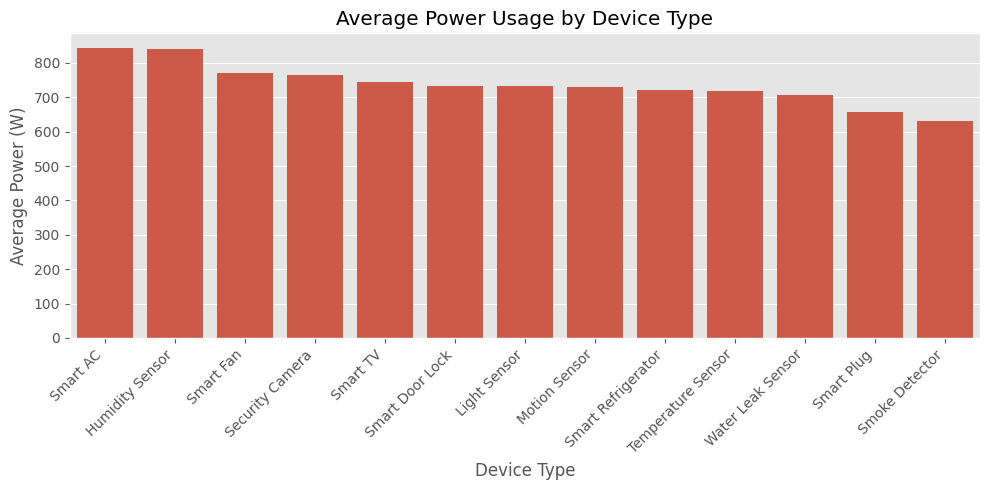

In [ ]:
# Average Power Usage per Device Type (Barplot)

plt.figure(figsize=(10, 5))
sns.barplot(x=power_by_device.index, y=power_by_device.values)
plt.title("Average Power Usage by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Power (W)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

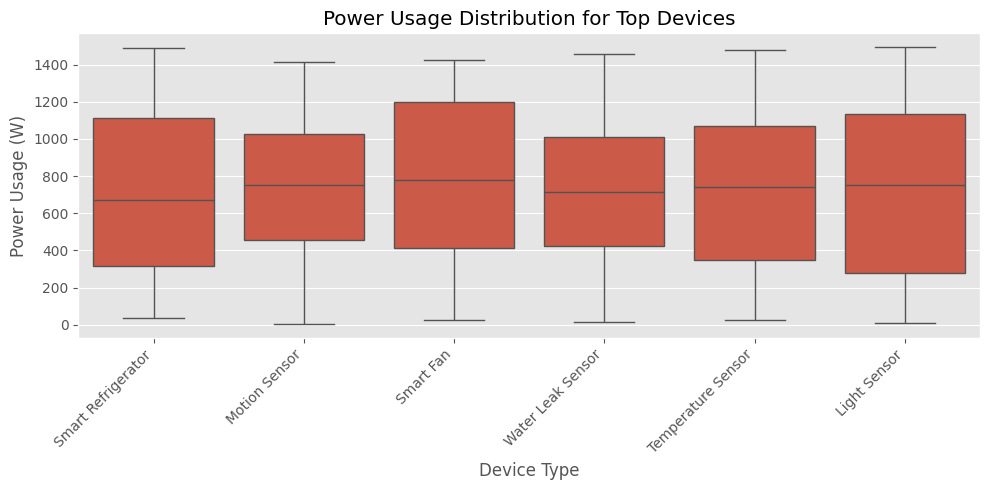

In [ ]:
# Power Usage Distribution by Top Devices (Boxplot)

top_devices = df["device_type"].value_counts().head(6).index

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df["device_type"].isin(top_devices)],
    x="device_type",
    y="power_usage_W"
)
plt.title("Power Usage Distribution for Top Devices")
plt.xlabel("Device Type")
plt.ylabel("Power Usage (W)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

MEC Performance Visualizations</b>

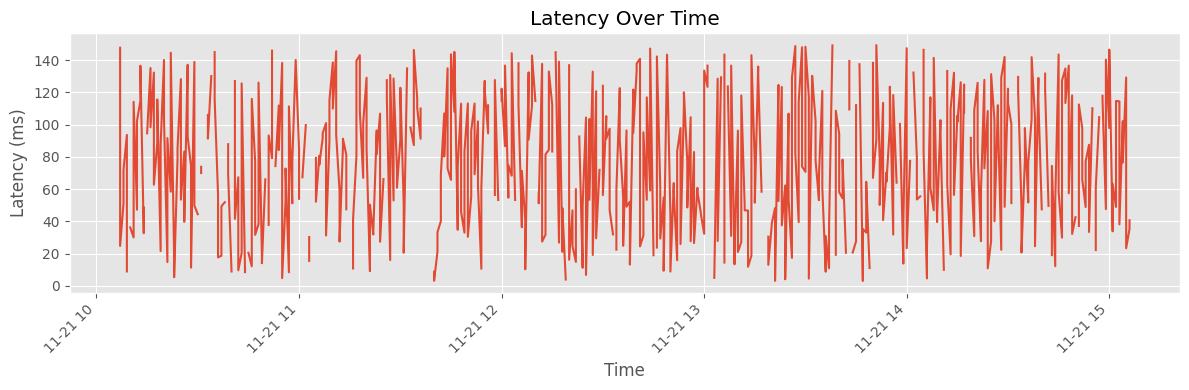

In [ ]:
# Latency Over Time (Line Plot)

df_sorted = df.sort_values("timestamp")

plt.figure(figsize=(12, 4))
plt.plot(df_sorted["timestamp"], df_sorted["latency_ms"])
plt.title("Latency Over Time")
plt.xlabel("Time")
plt.ylabel("Latency (ms)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
latency_by_edge = (
    df.groupby("edge_server")["latency_ms"]
      .mean()
      .sort_values()
)

print(latency_by_edge)

edge_server
Edge_2    72.405191
Edge_3    73.550915
Edge_1    74.967910
Edge_4    84.727594
Name: latency_ms, dtype: float64


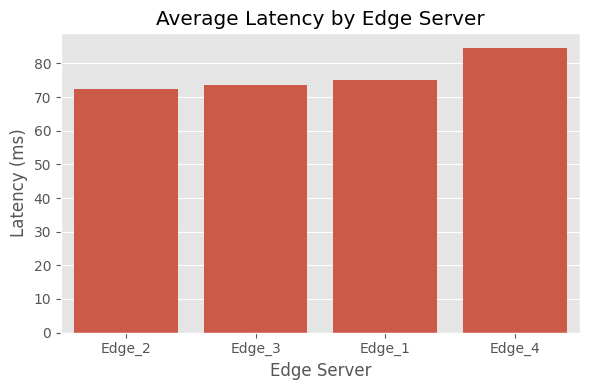

In [ ]:
# Average Latency by Edge Server (Barplot)

plt.figure(figsize=(6, 4))
sns.barplot(x=latency_by_edge.index, y=latency_by_edge.values)
plt.title("Average Latency by Edge Server")
plt.xlabel("Edge Server")
plt.ylabel("Latency (ms)")
plt.tight_layout()
plt.show()

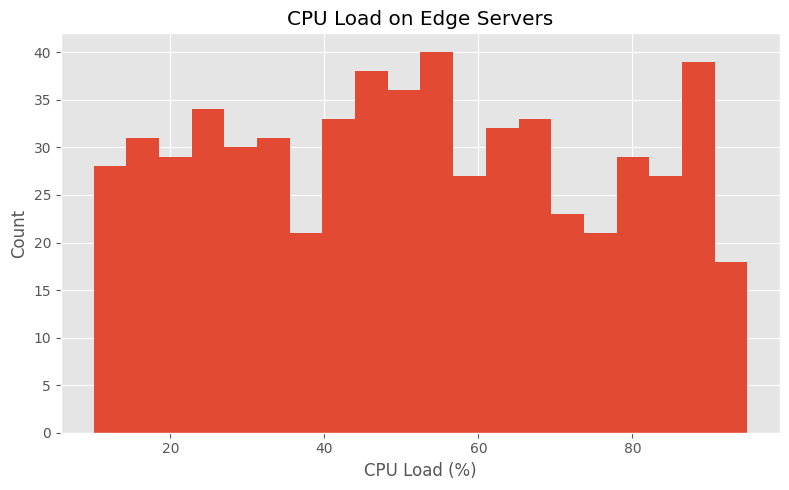

In [ ]:
# CPU Load Distribution (Histogram)

plt.figure(figsize=(8, 5))
plt.hist(df["cpu_load_edge_percent"], bins=20)
plt.title("CPU Load on Edge Servers")
plt.xlabel("CPU Load (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Network & Correlation Visualizations</b>

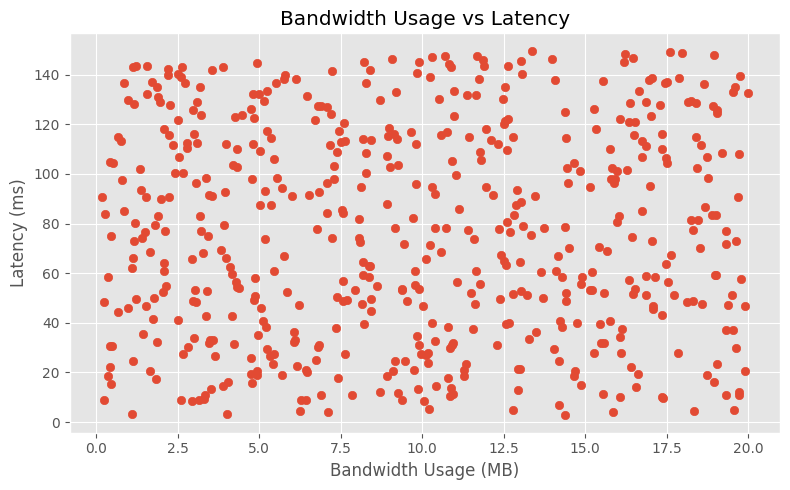

In [ ]:
# Bandwidth vs Latency (Scatter)

plt.figure(figsize=(8, 5))
plt.scatter(df["bandwidth_usage_MB"], df["latency_ms"])
plt.title("Bandwidth Usage vs Latency")
plt.xlabel("Bandwidth Usage (MB)")
plt.ylabel("Latency (ms)")
plt.tight_layout()
plt.show()

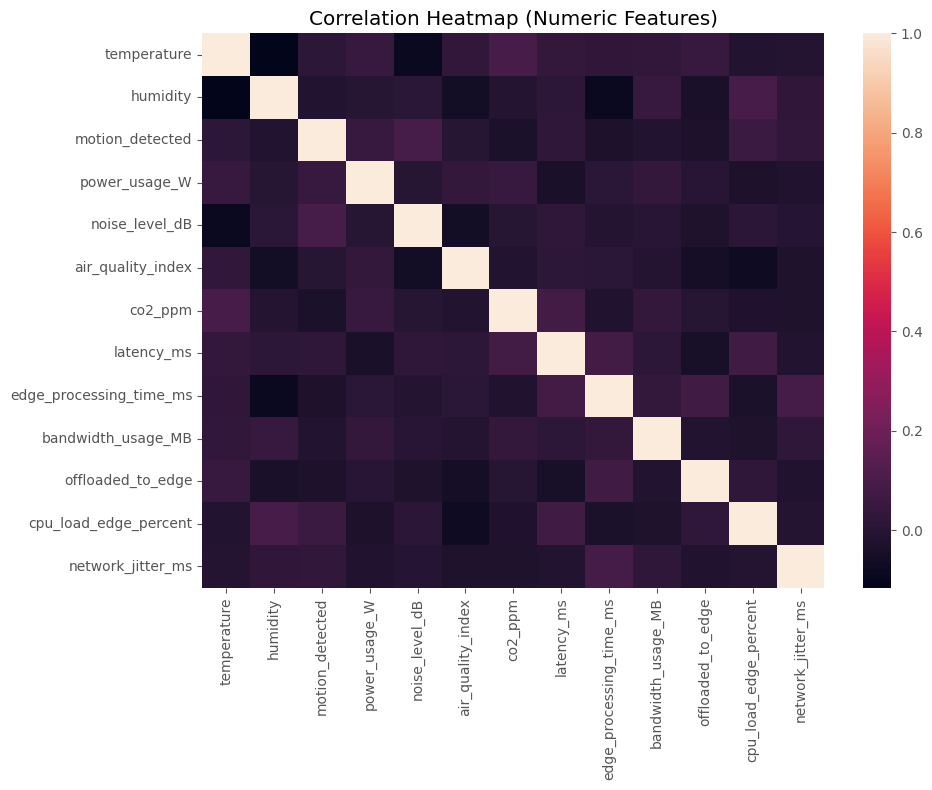

In [ ]:
# Correlation Heatmap (Numeric Features)

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

In [ ]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 device_id                   0
room                        0
device_type                 0
temperature                60
humidity                   60
motion_detected             0
power_usage_W              60
noise_level_dB             60
air_quality_index          60
co2_ppm                     0
latency_ms                 60
edge_processing_time_ms    60
bandwidth_usage_MB          0
edge_server                 0
offloaded_to_edge           0
cpu_load_edge_percent       0
network_jitter_ms           0
timestamp                   0
dtype: int64


 POWER USAGE PREDICTION</b>


In [ ]:
# Filter rows with known power_usage_W ---

df_power = df.dropna(subset=["power_usage_W"]).copy()

In [ ]:
# Handle missing numeric values using mean ---

numeric_cols = df_power.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("power_usage_W")  # target ko chhod do

df_power[numeric_cols] = df_power[numeric_cols].fillna(df_power[numeric_cols].mean())

In [ ]:
# Select features and target ---

X_power = df_power.drop(columns=["power_usage_W", "device_id", "timestamp"])
y_power = df_power["power_usage_W"]

In [ ]:
# One-hot encoding for categorical columns

X_power = pd.get_dummies(X_power, columns=["room", "device_type", "edge_server"], drop_first=True)

In [ ]:
# Train-test split ---
    
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_power, y_power, test_size=0.2, random_state=42
)

In [ ]:
# Train Random Forest Regressor ---

rf_power = RandomForestRegressor(n_estimators=200, random_state=42)
rf_power.fit(X_train_p, y_train_p)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predictions & Evaluation ---

y_pred_p = rf_power.predict(X_test_p)

mae_p = mean_absolute_error(y_test_p, y_pred_p)
rmse_p = np.sqrt(mean_squared_error(y_test_p, y_pred_p))
r2_p = r2_score(y_test_p, y_pred_p)

print("\n=== MODEL 1: POWER USAGE PREDICTION ===")
print("MAE  :", mae_p)
print("RMSE :", rmse_p)
print("R^2  :", r2_p)


=== MODEL 1: POWER USAGE PREDICTION ===
MAE  : 395.46997083333326
RMSE : 457.91517149759005
R^2  : -0.037409583995375195


LATENCY PREDICTION</b>


In [ ]:
# Filter rows with known latency ---

df_lat = df.dropna(subset=["latency_ms"]).copy()

In [ ]:
 # Handle missing numeric values using mean ---

numeric_cols_lat = df_lat.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_lat.remove("latency_ms")

df_lat[numeric_cols_lat] = df_lat[numeric_cols_lat].fillna(df_lat[numeric_cols_lat].mean())

In [ ]:
# Features & target ---

X_lat = df_lat.drop(columns=["latency_ms", "device_id", "timestamp"])
y_lat = df_lat["latency_ms"]

X_lat = pd.get_dummies(X_lat, columns=["room", "device_type", "edge_server"], drop_first=True)

In [ ]:
# Train-test split ---
    
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lat, y_lat, test_size=0.2, random_state=42
)

In [ ]:
 # Random Forest Model ---

rf_lat = RandomForestRegressor(n_estimators=200, random_state=42)
rf_lat.fit(X_train_l, y_train_l)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predictions & Evaluation ---

y_pred_l = rf_lat.predict(X_test_l)

mae_l = mean_absolute_error(y_test_l, y_pred_l)
rmse_l = np.sqrt(mean_squared_error(y_test_l, y_pred_l))
r2_l = r2_score(y_test_l, y_pred_l)

print("\n=== MODEL 2: LATENCY PREDICTION ===")
print("MAE  :", mae_l)
print("RMSE :", rmse_l)
print("R^2  :", r2_l)

lat_results = pd.DataFrame({
    "Actual_latency": y_test_l.values[:10],
    "Predicted_latency": y_pred_l[:10]
})
print("\nSample predictions (latency):\n", lat_results)


=== MODEL 2: LATENCY PREDICTION ===
MAE  : 37.78855601851853
RMSE : 43.88582849967614
R^2  : -0.10627294289679035

Sample predictions (latency):
    Actual_latency  Predicted_latency
0           32.29           87.46620
1          102.63           81.62460
2          132.34           93.35345
3          108.90           91.13700
4          116.01           87.22070
5           10.88           92.39160
6           49.47           78.08340
7           10.77           61.75375
8           53.25           71.63660
9          116.15           80.39300
